# CNN PROJECT




**This project Convolutional Neural Network (CNN) to classify CIFAR images. Because this project uses the cifer dataset, creating and training your model will take just a few lines of code. and deploy it to Gradio **

#Requirement
tensorflow
numpy
pillow
gradio


# import Tensorflow

In [64]:
import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

### Download and prepare the CIFAR10 dataset


The CIFAR10 dataset contains 60,000 color images in 10 classes, with 6,000 images in each class. The dataset is divided into 50,000 training images and 10,000 testing images. The classes are mutually exclusive and there is no overlap between them.

In [65]:
data = datasets.cifar10.load_data()

In [66]:
(X_train, y_train), (X_test, y_test) = data
X_train, X_test = X_train/255.0, X_test/255.0

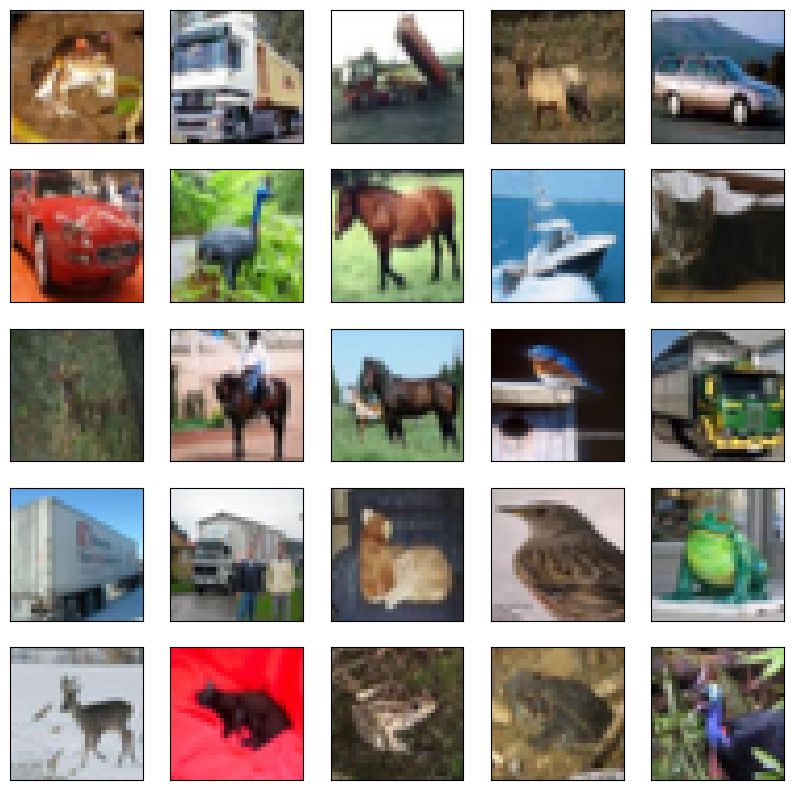

In [67]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i], cmap=plt.cm.binary)
plt.show()


In [68]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [69]:
model.summary

<bound method Model.summary of <Sequential name=sequential_2, built=True>>

In [70]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

In [71]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 4, 4, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │        65,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 122,570 (478.79 KB)

 Trainable params: 122,570 (478.79 KB)

 Non-trainable params: 0 (0.00 B)

In [72]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [73]:
# early stopping
import tensorflow as tf
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.0001,
    patience=20,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
    start_from_epoch=0,
)

In [74]:


history = model.fit( X_train, y_train, epochs=10, validation_data=(X_test, y_test), callbacks = early_stopping)

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 71s 44ms/step - accuracy: 0.3470 - loss: 1.7605 - val_accuracy: 0.5313 - val_loss: 1.2860
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 82s 44ms/step - accuracy: 0.5673 - loss: 1.2225 - val_accuracy: 0.5828 - val_loss: 1.1628
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 81s 43ms/step - accuracy: 0.6312 - loss: 1.0501 - val_accuracy: 0.6512 - val_loss: 1.0071
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 66s 43ms/step - accuracy: 0.6650 - loss: 0.9484 - val_accuracy: 0.6606 - val_loss: 0.9626
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 68s 43ms/step - accuracy: 0.6952 - loss: 0.8643 - val_accuracy: 0.6820 - val_loss: 0.9053
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 68s 44ms/step - accuracy: 0.7223 - loss: 0.7951 - val_accuracy: 0.6985 - val_loss: 0.8760
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 79s 42ms/step - accuracy: 0.7372 - loss: 0.7483 - val_accuracy: 0.6980 - val_loss: 0.8882
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 67s 43ms/step - accuracy: 0.7551 -

313/313 - 5s - 15ms/step - accuracy: 0.7065 - loss: 0.8715


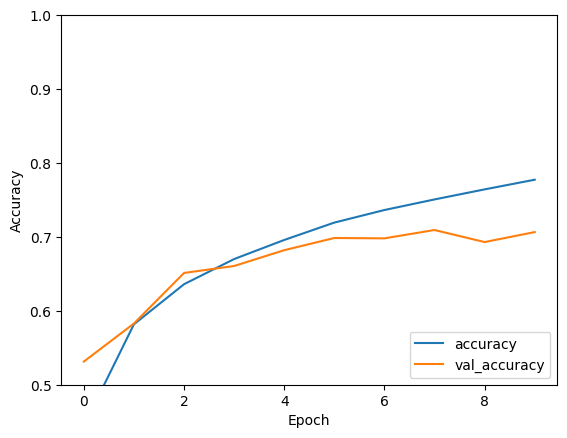

In [75]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')
test_loss, test_acc = model.evaluate(X_test,  y_test, verbose=2)

In [76]:
print(test_acc)

0.7064999938011169


In [77]:
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Accuracy: {test_acc * 100:.2f}%")

# If you want train accuracy too
train_loss, train_acc = model.evaluate(X_train, y_train, verbos\e=0)
print(f"Train Accuracy: {train_acc * 100:.2f}%")

Test Accuracy: 70.65%
Train Accuracy: 80.65%


In [78]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Train predictions
y_train_pred = model.predict(X_train)
y_train_pred_classes = y_train_pred.argmax(axis=1)




1563/1563 ━━━━━━━━━━━━━━━━━━━━ 19s 12ms/step


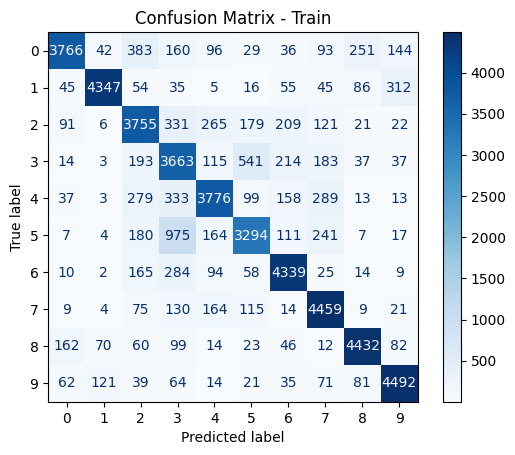

In [79]:
cm_train = confusion_matrix(y_train, y_train_pred_classes)
disp_train = ConfusionMatrixDisplay(confusion_matrix=cm_train)
disp_train.plot(cmap="Blues")
plt.title("Confusion Matrix - Train")
plt.show()



In [80]:
y_test_pred = model.predict(X_test)
y_test_pred_classes = y_test_pred.argmax(axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step


In [81]:
import gradio as gr
import tensorflow as tf
import numpy as np
from PIL import Image

# Load your trained model
model = tf.keras.models.load_model("cifar10_model.h5")
class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']

def predict_image(img):
    img = img.resize((32,32))
    img_array = np.array(img)/255.0
    img_array = np.expand_dims(img_array, axis=0)
    prediction = model.predict(img_array)
    return {class_names[i]: float(prediction[0][i]) for i in range(10)}

demo = gr.Interface(fn=predict_image,
                    inputs=gr.Image(type="pil"),
                    outputs=gr.Label(num_top_classes=3))

demo.launch()


It looks like you are running Gradio on a hosted Jupyter notebook, which requires `share=True`. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://a0e77248f8f508e645.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
